# Chimp Sniffing Behaviors

Do chimps sniff more at different ages?

In [1]:
# Loading library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading data
sniff_sum = pd.read_csv('./data/sniff_summary.csv')
sniffs = pd.read_csv('./data/sniffing_clean.csv')

Make plot with average age compared to number of sniffs

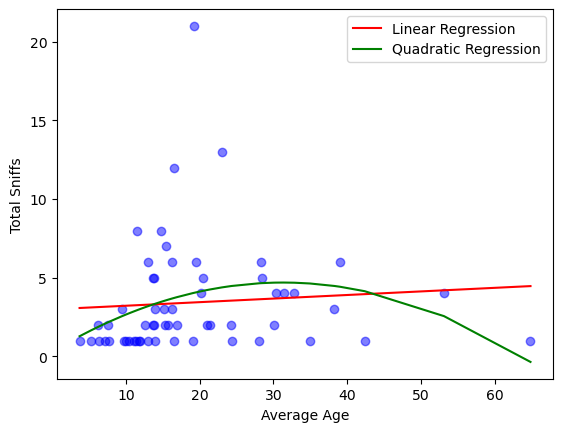

the quadratic model SSE is  663.7728247243213 .
the linear model SSE is  718.1319487949463 .


In [12]:
# sort age so it doesn't give zigzag lines in regression
sniff_sum = sniff_sum.sort_values('Age', ascending = False).reset_index(drop=True)

x = sniff_sum.Age
y = sniff_sum.TotalSniffs

# linear regression
coeff = np.polyfit(x, y, deg=1)
slope = coeff[0]
intercept = coeff[1]
y_hat = np.polyval(coeff, x)

# quadratic regression
quad_coeffs = np.polyfit(x, y, deg=2)
quadratic_fit = np.polyval(quad_coeffs, x)
slope = quad_coeffs[0]
intercept = quad_coeffs[1]
y_hat2 = np.polyval(quad_coeffs, x)

# Plot it all
plt.scatter(x, y, color ='blue', alpha = 0.5)
plt.plot(x, y_hat, color='red', label='Linear Regression')
plt.plot(x, quadratic_fit, color='green', label='Quadratic Regression')
plt.ylabel('Total Sniffs')
plt.xlabel('Average Age')
plt.legend()
plt.show()

# Do math
def sse(y_hat, y):
    # Compute the Sum of Squared Errors (SSE)
    sse = sum( (y-y_hat)**2 )
    return sse

quadratic_sse = sse(quadratic_fit, y)
print("the quadratic model SSE is ", quadratic_sse, ".")
# SSE = 663.7728247243213 (quadratic is better)

linear_sse = sse(y_hat, y)
print("the linear model SSE is ", linear_sse, ".")
# SSE = 718.1319487949463

But I don't think using average and total sniffs makes sense. I am going to try just using age and sniff occurances across all individuals

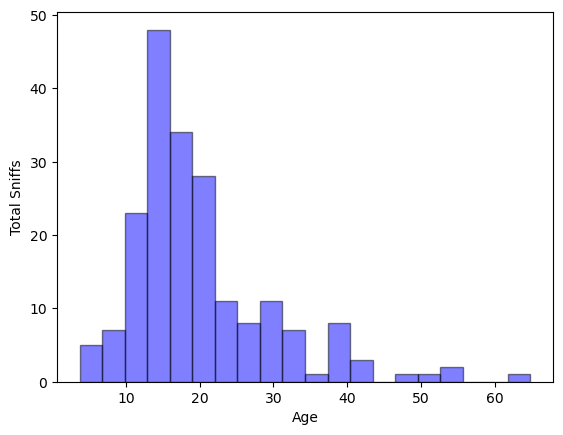

In [10]:
# make version of sniffs with less columns
sniffs2 = sniffs[['Date', 'Time', 'Individual', 'Age', 'Sex', 'Sniff', ]].copy()

# Since each line is 1 sniff, I could do a histogram of ages
plt.hist(sniffs2.Age, bins = 20, color = 'b', edgecolor = 'k', alpha = 0.5);
plt.xlabel('Age')
plt.ylabel('Total Sniffs')

# sort age so it doesn't give zigzag lines in regression
sniffs2 = sniffs2.sort_values('Age', ascending = False).reset_index(drop=True)

# But this is probably biased because they mostly follow younger chimps